 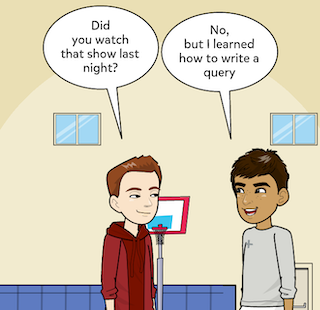

<h1>M1 01 : Relational DataBase</h1>

In [53]:
#Data Viz
import matplotlib.pyplot as plt
import matplotlib.image as img

#Data Manipulation
import pandas as pd 

#Data Base
import mysql.connector

In [54]:
user_name = 'root'
password = 'Freegalado-SQL-22'

<h2>Exercises 1</h2>

**From the attached documents (structure and data), create a database with MySQL. It shows the main characteristics of the created scheme and explains the different tables and variables that exist.**

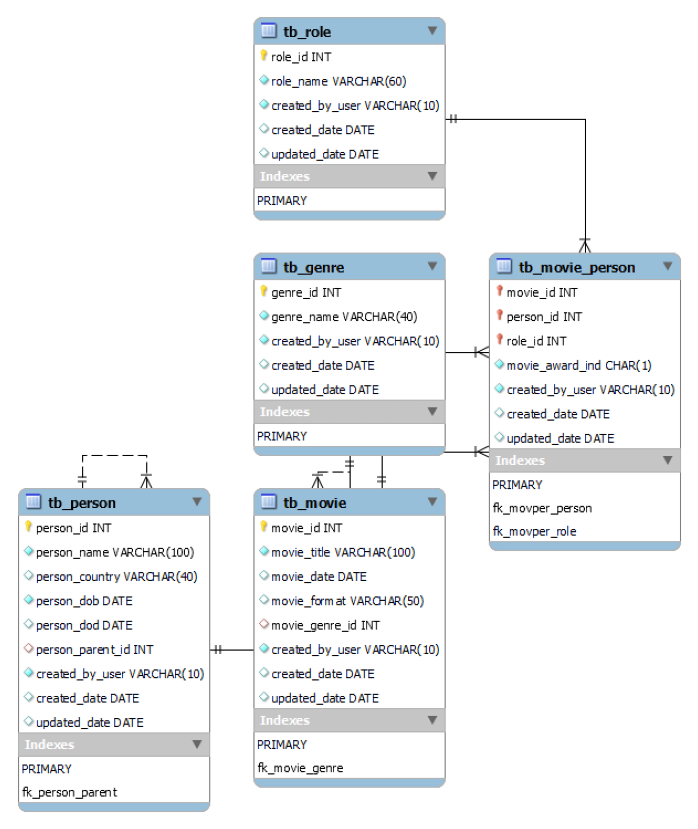

In [55]:
fig, ax = plt.subplots(figsize=(15, 15))
fig = img.imread('EER Movies.png')
plt.imshow(fig)
plt.axis('off')
plt.show()

The EER diagram was made with the SQL workbench and shows the relation between the tables and principal keys

<h2>Exercises 2</h2>

**Make the following query on the newly created database:**

**You must obtain the name, country and date of birth of those persons for whom a date of death is not stated and sort the data from the oldest person to the youngest person.**

In [56]:
#Conect to local DB
mydb = mysql.connector.connect(
  host="localhost",
  user=user_name,
  passwd=password,
  database="movies"
)


print(mydb)

In [57]:
#Creating a cursor object using the cursor() method
myCursor = mydb.cursor()

In [58]:
#query  
sql = "SELECT person_name,person_country, person_dob FROM tb_person WHERE person_dod IS NULL ORDER by person_dob"

In [59]:
#show the databases available in mysql
 
myCursor.execute("SHOW TABLES")

for dbs in myCursor:
  print(dbs)

('tb_genre',)
('tb_movie',)
('tb_movie_person',)
('tb_person',)
('tb_role',)


In [60]:
pd.read_sql(sql,mydb)

,person_name,person_country,person_dob
0,John Williams,United States,1928-08-08
1,Vera Miles,United States,1929-08-23
2,Sean Connery,Scotland,1930-07-08
3,Robert Duvall,United States,1931-01-05
4,Morgan Freeman,United States,1935-10-01
5,Francis Ford Coppola,United States,1939-04-07
6,Gary Kurtz,United States,1940-07-27
7,Martin Sheen,United States,1940-08-03
8,Harrison Ford,United States,1942-07-13
9,George Lucas,United States,1944-05-14


The query result is sorted by date of birth.

<h2>Exercises 3</h2>

**Make the following query on the newly created database:**

**You have to get the name of the genre and the total number of movies of that genre and sort it in descending order of total number of movies.**

In [61]:
mydb = mysql.connector.connect(
  host="localhost",
  user=user_name,
  passwd=password,
  database="movies"
)

In [62]:
#query
sql3 = "SELECT tb_genre.genre_name, COUNT(tb_movie.movie_title) AS numTitles FROM tb_movie \
        LEFT JOIN tb_genre ON tb_genre.genre_id = tb_movie.movie_genre_id\
        GROUP BY tb_genre.genre_name\
        ORDER by numTitles DESC"

In [63]:
pd.read_sql(sql3,mydb)

,genre_name,numTitles
0,Comedia,3
1,Ciencia Ficción,2
2,Acción,2
3,Suspense,2
4,Drama,2
5,Bélico,1
6,Terror,1
7,Fantasía,1
8,Romance,1


The query result show us that the genre Comedy is the most produced genre

<h2>Exercises 4</h2>

**Make the following query on the newly created database:**

**You have to get, for each person, their name and the maximum number of different roles they have played in the same movie.
Subsequently, it shows only those people who have taken on more than one role in the same film.**

In [64]:
mydb = mysql.connector.connect(
  host="localhost",
  user=user_name,
  passwd=password,
  database="movies"
)

In [65]:
#query
sql4_1 = "SELECT  tb_person.person_name, max(numRol) as numRol FROM (\
        SELECT tb_person.person_id, tb_person.person_name, tb_movie.movie_id, tb_movie.movie_title, count(*) AS numRol\
        FROM tb_person \
        JOIN tb_movie_person ON tb_person.person_id = tb_movie_person.person_id\
        JOIN tb_movie  ON tb_movie_person.movie_id = tb_movie.movie_id \
        JOIN tb_role ON tb_movie_person.role_id = tb_role.role_id\
        GROUP BY tb_person.person_id, tb_movie.movie_id\
        ORDER BY numRol desc) tb_person\
        GROUP BY tb_person.person_id"

In [66]:
pd.read_sql(sql4_1,mydb)

,person_name,numRol
0,Alfred Joseph Hitchcock,3
1,Francis Ford Coppola,3
2,George Lucas,2
3,Steven Spielberg,2
4,Martin Sheen,1
5,Harrison Ford,1
6,Charlie Sheen,1
7,Tom Hanks,1
8,Catherine Zeta-Jones,1
9,Dani Rovira,1


The query result show us the maximum number of roles that a person have in a movie.

In [67]:
sql4_2 = "SELECT  tb_person.person_name, max(numRol) as numRol FROM (\
        SELECT tb_person.person_id, tb_person.person_name, tb_movie.movie_id, tb_movie.movie_title, count(*) as numRol \
        FROM tb_person \
        JOIN tb_movie_person ON tb_person.person_id = tb_movie_person.person_id\
        JOIN tb_movie  ON tb_movie_person.movie_id = tb_movie.movie_id \
        JOIN tb_role ON tb_movie_person.role_id = tb_role.role_id\
        GROUP BY tb_person.person_id, tb_movie.movie_id\
        HAVING numRol > 1\
        ORDER BY numRol desc) tb_person\
        GROUP BY tb_person.person_id"

In [68]:
pd.read_sql(sql4_2,mydb)

,person_name,numRol
0,Alfred Joseph Hitchcock,3
1,Francis Ford Coppola,3
2,George Lucas,2
3,Steven Spielberg,2


in this query the HAVING clause is used as conditional to keep only the people with more than 1 role in a movie.

<h2>Exercises 5</h2>

**Make the following query on the newly created database:**

**You have to create a new genre called "Documentary" which has the number 69 as its identifier.**

In [69]:
mydb = mysql.connector.connect(
  host="localhost",
  user=user_name,
  passwd=password,
  database="movies"
)

```mysql
INSERT INTO movies.tb_genre (genre_id, genre_name, created_by_user, created_date, updated_date) VALUES (12, 'Documental', 'FcoReg', '2022-07-17', '2022-07-19')
```

I preferred to use MySQL Workbench for this exercise, the above query was used.

In [70]:
sql5_view = "SELECT * FROM tb_genre"

In [71]:
pd.read_sql(sql5_view,mydb)

,genre_id,genre_name,created_by_user,created_date,updated_date
0,1,Acción,OS_SGAD,None,None
1,2,Ciencia Ficción,OS_SGAD,None,None
2,3,Comedia,OS_SGAD,None,None
3,4,Drama,OS_SGAD,None,None
4,5,Fantasía,apermag,None,None
5,6,Melodrama,apermag,2018-09-01,2018-09-27
6,7,Musical,OS_SGAD,None,None
7,8,Romance,OS_SGAD,None,None
8,9,Suspense,OS_SGAD,None,None
9,10,Terror,OS_SGAD,None,None


The Documental genre was added to the genre table.

<h2>Exercises 6</h2>

**Make the following query on the newly created database:**

**Removes the movie "La Gran Familia Española" from the database.**

In [72]:
mydb = mysql.connector.connect(
  host="localhost",
  user=user_name,
  passwd=password,
  database="movies"
)

```mysql
DELETE FROM movies.tb_movie WHERE (movie_id = 11)
```

I preferred to use MySQL Workbench for this exercise, the above query was used.

In [73]:
#query
sql6_view = "SELECT * FROM tb_movie"

In [74]:
pd.read_sql(sql6_view,mydb)

,movie_id,movie_title,movie_date,movie_format,movie_genre_id,created_by_user,created_date,updated_date
0,1,Apocalypse Now,1979-05-10,Film,11,OS_SGAD,None,None
1,2,Star Wars:Episode IV - A New Hope,1977-05-25,Film,2,OS_SGAD,None,None
2,3,Indiana Jones and the Temple of Doom,1984-05-08,Film,1,OS_SGAD,None,None
3,4,The Terminal,2004-06-18,Digital,3,OS_SGAD,None,None
4,5,Jaws,1975-01-01,Film,10,OS_SGAD,None,None
5,6,ET The Extraterrestrial,1982-07-25,Film,5,OS_SGAD,None,None
6,7,Psycho,1960-05-06,Film,9,OS_SGAD,None,None
7,8,Ocho Apellidos Vascos,2014-03-14,Digital,3,OS_SGAD,None,None
8,9,Ocho Apellidos Catalanes,2016-06-09,Digital,3,OS_SGAD,None,None
9,10,El otro lado de la cama,2002-09-04,Digital,8,OS_SGAD,None,None


<h2>Exercises 7</h2>

**Make the following query on the newly created database:**

**It changes the genre of the film "Ocho apellidos catalanes" so that it is listed as a comedy and not as a romantic one.**

In [75]:
mydb = mysql.connector.connect(
  host="localhost",
  user=user_name,
  passwd=password,
  database="movies"
)

```mysql
UPDATE movies.tb_movie SET movie_genre_id = 3 WHERE (movie_id = 9)
``` 

I preferred to use MySQL Workbench for this exercise, the above query was used.

In [76]:
#query
sql7_view = "SELECT tb_movie.movie_title,  tb_genre.genre_id, tb_genre.genre_name\
            FROM tb_movie\
            LEFT JOIN tb_genre ON tb_genre.genre_id = tb_movie.movie_genre_id"

In [77]:
pd.read_sql(sql7_view,mydb)

,movie_title,genre_id,genre_name
0,Apocalypse Now,11,Bélico
1,Star Wars:Episode IV - A New Hope,2,Ciencia Ficción
2,Indiana Jones and the Temple of Doom,1,Acción
3,The Terminal,3,Comedia
4,Jaws,10,Terror
5,ET The Extraterrestrial,5,Fantasía
6,Psycho,9,Suspense
7,Ocho Apellidos Vascos,3,Comedia
8,Ocho Apellidos Catalanes,3,Comedia
9,El otro lado de la cama,8,Romance


The query result show us that the movie Ocho Apellidos Catalanes have a genre update from Romance to Comedy.